<a href="https://githubtocolab.com/borislevant/python4ml/blob/main/regression.ipynb" target="_parent"><img src="./img/colab-badge.svg" alt="Open in Colab"/></a>

# Linear Regression

[![scikit-learn logo](./img/scikit-learn-logo-small.png)](https://scikit-learn.org/stable/)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
%matplotlib inline


## Supervised learning

Supervised learning (SL) is a machine learning paradigm for problems where the available data consists of labelled examples, meaning that each data point contains features (covariates) and an associated label. The goal of supervised learning algorithms is learning a function that maps feature vectors (inputs) to labels (output), based on example input-output pairs. It infers a function from labeled training data consisting of a set of training examples. In supervised learning, each example is a pair consisting of an input object (typically a vector) and a desired output value (also called the supervisory signal). A supervised learning algorithm analyzes the training data and produces an inferred function, which can be used for mapping new examples. An optimal scenario will allow for the algorithm to correctly determine the class labels for unseen instances. This requires the learning algorithm to generalize from the training data to unseen situations in a "reasonable" way (see inductive bias). This statistical quality of an algorithm is measured through the so-called generalization error.

The most popular python toolbox for solution of Machine Learning problems is *scikit-learn*. To install it just type
```
pip install scikit-learn
```

All supervised estimators (models) in *scikit-learn* (both for regression and classification problems) implement a `fit(X, y)` method to fit the model and a `predict(X)` method that, given unlabeled observations `X`, returns the predicted labels `y`.

In this section we will learn how to train, use and estimate the *linear regression*. We will work with 2 datasets
* healthexp - for the simple 1-parameter `X` linear regression
* pinguins - for the more sofisticated models, involving multiple parameter/polynomial regression


## Life Expectancy vs. Spendings

Let's load the data set from the standard set of Seaborn package


In [2]:
# Those who have internet connection can load the data like this:
#df = sns.load_dataset('healthexp')

df = pd.read_csv('./data/healthexp.csv')
df.head(5)

,Year,Country,Spending_USD,Life_Expectancy
0,1970,Germany,252.311,70.6
1,1970,France,192.143,72.2
2,1970,Great Britain,123.993,71.9
3,1970,Japan,150.437,72.0
4,1970,USA,326.961,70.9


The simplest model for such predictions is the linear model
$$
\widehat{y} = ax + b
$$
where here $x$ is the aces and $y$ is the points won.
The model parameters can be interpreted as follows:
- the intercept $b$ is the estimate for points won if 0 points were aced, and
- the slope $a$ is the estimate for the linear increase in points won for every additional ace.

We then look for $a$ and $b$ such that this loss function is minimized:
$$
loss = \sum_{i=1}^n{(y-\widehat{y})^2}
$$
Note that this loss is just the square of the residuals -- the difference between the true value $y$ and the predicted value $\widehat{y}$.

Let's use Scikit-learn to fit a linear regression model.

We import the model, and format the data the way scikit-learn likes it.

In [3]:
X = df.loc[df.Country=='Canada', 'Spending_USD'].values.reshape((-1, 1))
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X, y)
print("R^2: {:.4f}".format(lin_model.score(X, y)))

R^2: 0.9321


$R^2$ is between $0$ and $1$, and it determines the proportion of variation in $y$ explained by the linear regression. 93% is quite a good fit. Just as a reminder:
$$
R^2 = 1 - \frac{SSE}{SST} = 1 - \frac{\sum (y-\widehat{y})^2}{\sum (y-\bar{y})},
$$
where $y$ - are original values, $\widehat{y}$ - predicted values and $\bar{y}$ - are the average of the original values of the Life expectancy (dependant variable)

Let's look at the plots

Text(0.5, 1.0, 'Country: Canada')

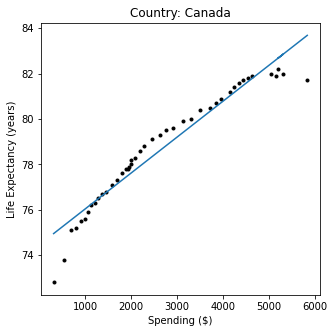

In [4]:
plt.figure(figsize=(5, 5))
plt.plot(X, y, '.k')
plt.plot(X, lin_model.predict(X))
plt.xlabel('Spending ($)')
plt.ylabel('Life Expectancy (years)')
plt.title('Country: Canada')

We can easily get the parameters of the model in the following way:

In [5]:
print('The parameters of the model y=ax+b are')
print(f'a={lin_model.coef_[0]}')
print(f'b={lin_model.intercept_}')

The parameters of the model y=ax+b are
a=0.0015828050279988568
b=74.45575471973685


How we can use the model? Suppose that given the data we want to estimate how much will be the Life expectancy for the Spendings of $1000$? The answer is we plug $x=1000$ into the model that we trained on the data and get the predicted answer

In [6]:
def get_prediction(model, x):
    return model.coef_[0] * x + model.intercept_

print(f'The Life expectancy for x=1000 is {get_prediction(lin_model, 1000)}')
print(f'The Life expectancy for x=20000 is {get_prediction(lin_model, 20000)}')

The Life expectancy for x=1000 is 76.0385597477357
The Life expectancy for x=20000 is 106.11185527971398


For $1000$ the prediction is good. However, the model predicts that for $20000$, Life expectancy will be 139 years (!) - it's improssible. What is the exaplnation? The answer is: extrapolation is very dangerous


## Risidual analysis: how good is our fit?

First of all, let's compute the MSE - *mean square error* - very important measure of goodness of fit
$$
MSE = \frac{1}{n} \sum_{i=1}^n{(y-\widehat{y})^2}
$$

Let's plot the Original values vs. the Prediction. In addition, we plot the line
$$
y=x
$$
The distances between the points of the graph to this line are the residuals. The module *sklearn* contains the sub-module *metrics* that contains the function computing the MSE:
```
from sklearn import metrics
metrics.mean_squared_error(y, y_pred)
```


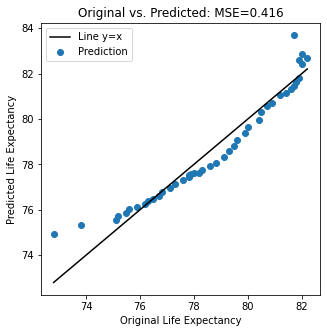

In [7]:
from sklearn import metrics

y_pred = lin_model.predict(X)

plt.figure(figsize=(5, 5))
plt.scatter(y, y_pred, label='Prediction')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k', label='Line y=x')
plt.xlabel('Original Life Expectancy')
plt.ylabel('Predicted Life Expectancy')
plt.title(f'Original vs. Predicted: MSE={np.round(metrics.mean_squared_error(y, y_pred), 3)}')
plt.legend()

### Excercise 1

Please, implement the function *mse* below to compute the MSE between the original values and the predicted values and compare it's result to the *metrics.mean_squared_error*
$$
MSE = \frac{1}{n} \sum_{i=1}^n{(y-\widehat{y})^2}
$$

In [8]:
def mse(y_original, y_predicted):
    # Your code goes here
    return 0

print(metrics.mean_squared_error(y, y_pred) - mse(y, y_pred))

0.41555451352034783


We see that the $R^2=0.93$ and the $MSE=0.416$. How good is it? To answer this quesiton we would like to plot the risiduals: the graph of errors
$$
y-\widehat{y}
$$

Text(0.5, 1.0, 'Plot of risuduals')

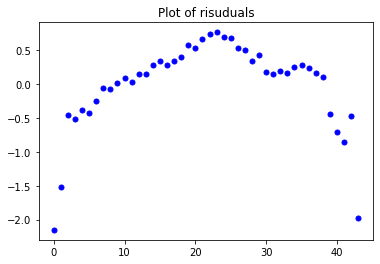

In [9]:
plt.plot(y-y_pred, color='b', ls='-', lw='0', marker='.', markersize='10')
plt.title('Plot of risuduals')

We see that indeed, although the metrics of the regression seem good, the linear model doesn't completely describe the data. We need something else

Before we do the Polynomial regression, we show how to use the package *scipy* for the other statistical metrics of the Regression models:


In [10]:
from scipy import stats
X = df.loc[df.Country=='Canada', 'Spending_USD'].values
slope, intercept, r_value, pvalue, std_err = stats.linregress(X, y)
print(f'Slope={slope}, Intercept={intercept}')
print(f'R^2={r_value}, p-Value={pvalue}, STD_Err={std_err}')


Slope=0.0015828050279988574, Intercept=74.45575471973685
R^2=0.9654459122564468, p-Value=3.7450476620961414e-26, STD_Err=6.592575197215274e-05


## Polynomial regression

We would like to extend our simple model to quadritic model
$$
y = a x^2 + b x + c
$$

In order to use polynomial regression of order 2, we just add the square of the *Spendings* feature to our original table. We will use the following syntax of Pandas to do it
```
df['Spending_USD_Square'] = df['Spending_USD']**2
```
It creates the new column named *Spending_USD_Square*, that equals to the square of the values of the column *Spending_USD*.

Afterward, we create a new multiple linear regression using the columns *Spending_USD* and *Spending_USD_Square*


In [11]:
df['Spending_USD_Square'] = df['Spending_USD']**2
X2 = df.loc[df.Country=='Canada', ['Spending_USD', 'Spending_USD_Square']].values
y = df.loc[df.Country=='Canada', 'Life_Expectancy'].values
lin_model = linear_model.LinearRegression()
lin_model.fit(X2, y)
print("R^2: {:.4f}".format(lin_model.score(X2, y)))

R^2: 0.9921


We observe, that indeed, the $R^2$ improved significantly. Please, note that this is not an adjusted $R^2$ - doesn't take into account the number of variables (in our case 2). To remind you, the adjusted $R^2$ is calculated according to
$$
\hat{R}^2 = 1 - (1 - R^2) \frac{n-1}{n-p-1},
$$
where $n$ - is the number of samples, and $p$ is the number of independent variables. Let's calculate it from the usual $R^2$:

In [12]:
def adjusted_r_square(model, X, y):
    coefficient = (X.shape[0]-1) / (X.shape[0]-X.shape[1]-1)
    return (1 - (1-model.score(X, y)) * coefficient)

print(f'Adjusted R^2={adjusted_r_square(lin_model, X2, y)}')

Adjusted R^2=0.9917539081280501


What is the meaning of this model? It means that given Spending of $1000 a year, we can calculate the predicted Life Expectancy according to the model, even if we don't have this data at hand

### Excersise 2

Implement the function *predict_model*, that given the model and the variable returns the predicted Life expectancy
Please, note that we printed the correct predicted values that your function should return

Why the expected value for the $x=15000$ less than for $x=1000$?

In [13]:
def predict_model(model, x):
    # Your code goes here
    return 0

print(f'For x=1000, the model predicts {predict_model(lin_model, 1000)}')
print(f'For x=5000, the model predicts {predict_model(lin_model, 5000)}')
print(f'For x=15000, the model predicts {predict_model(lin_model, 15000)}')

For x=1000, the model predicts 0
For x=5000, the model predicts 0
For x=15000, the model predicts 0


Let's see what about other metrics

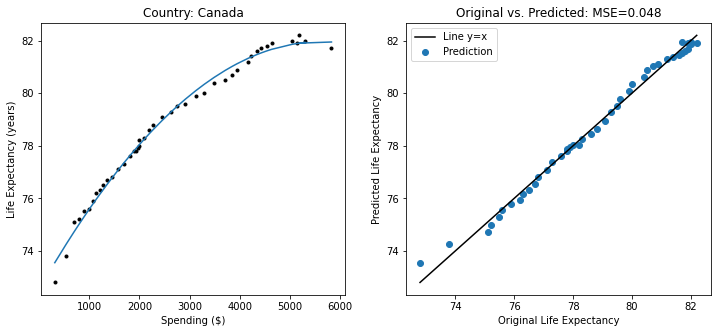

In [14]:
y_pred = lin_model.predict(X2)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12, 5))
ax[0].plot(X2[:, 0], y, '.k')
ax[0].plot(X2[:, 0], lin_model.predict(X2))
ax[0].set_xlabel('Spending ($)')
ax[0].set_ylabel('Life Expectancy (years)')
ax[0].set_title('Country: Canada')

ax[1].scatter(y, y_pred, label='Prediction')
ax[1].plot([y.min(), y.max()], [y.min(), y.max()], 'k', label='Line y=x')
ax[1].set_xlabel('Original Life Expectancy')
ax[1].set_ylabel('Predicted Life Expectancy')
ax[1].set_title(f'Original vs. Predicted: MSE={np.round(metrics.mean_squared_error(y, y_pred), 3)}')
ax[1].legend()

We see that co,paring to the Linear regression, our Polynomial regression of order 2 gets improves the MSE significantly - order of magnitude. What about the risiduals?

Text(0.5, 1.0, 'Plot of risuduals')

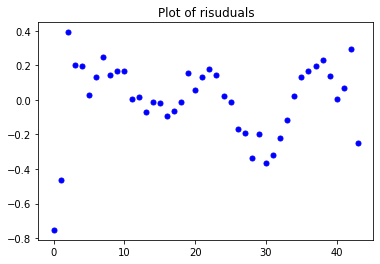

In [15]:
plt.plot(y-y_pred, color='b', ls='-', lw='0', marker='.', markersize='10')
plt.title('Plot of risuduals')

Indeed, the risiduals also behave now much more randomly than for the Linear regression

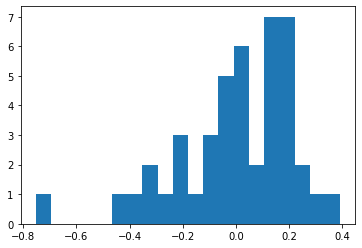

In [16]:
plt.hist(y-y_pred, bins=20)
plt.show()

### Excercise 3

Please, perform the same analysis for the Japan: Life expectancy as the function of Healthcare spendings
* Linear regression: show the graph of original vs. predicted Life expectancy
    * Calculate the $R^2$ and $MSE$
    * Show the risiduals
* Polynomial regression of order 2
    * Calculate the $R^2$ and $MSE$
    * Show the risiduals


## Multiple variables regression

In this part we will work with the multiple variables with the new dataset. A dataset *Diamonds* containing the prices and other attributes of almost 54,000 diamonds. The variables are as follows
* **Carat** : Carat weight of the Diamond.
* **Cut** : Describe cut quality of the diamond.
    * Quality in increasing order Fair, Good, Very Good, Premium, Ideal .
* **Color** : Color of the Diamond.
    * With D being the best and J the worst.
* **Clarity** : Diamond Clarity refers to the absence of the Inclusions and Blemishes.
    * (In order from Best to Worst, FL = flawless, I3= level 3 inclusions) FL, IF, VVS1, VVS2, VS1, VS2, SI1, SI2, I1, I2, I3
* **Depth** : The Height of a Diamond, measured from the Culet to the table, divided by its average Girdle Diameter.
* **Table** : The Width of the Diamond's Table expressed as a Percentage of its Average Diameter.
* **Price** : the Price of the Diamond.
* **X** : Length of the Diamond in mm.
* **Y** : Width of the Diamond in mm.
* **Z** : Height of the Diamond in mm.

*Qualitative Features (Categorical)* : Cut, Color, Clarity.

*Quantitative Features (Numerical)* : Carat, Depth , Table , Price , X , Y, Z.

**Price** is the Target Variable (in other words Dependant variable)


In [17]:
#dfd = sns.load_dataset('diamonds')
dfd = pd.read_csv('./data/diamonds.csv')
dfd.head(5)

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


First of all, let's check for the NaN values, to make sure all the values are valid. The function *isnull* returns the indexes of the NaN values in each column of the DataFrame. Afterwards, *sum* counts those values. It turns out that there is no NaN in the dataset

In [18]:
dfd.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [19]:
dfd.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


Looking carefully at the description of the data, we observe that there are $0$ values for the columns $x$, $y$, $z$. It's clearly not possible, so let's clean those outliers from the data

In [20]:
dfd = dfd[(dfd[['x','y','z']] != 0).all(axis=1)]
dfd.describe()


,carat,depth,table,price,x,y,z
count,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000,53920.000000
mean,0.797698,61.749514,57.456834,3930.993231,5.731627,5.734887,3.540046
std,0.473795,1.432331,2.234064,3987.280446,1.119423,1.140126,0.702530
min,0.200000,43.000000,43.000000,326.000000,3.730000,3.680000,1.070000
25%,0.400000,61.000000,56.000000,949.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5323.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


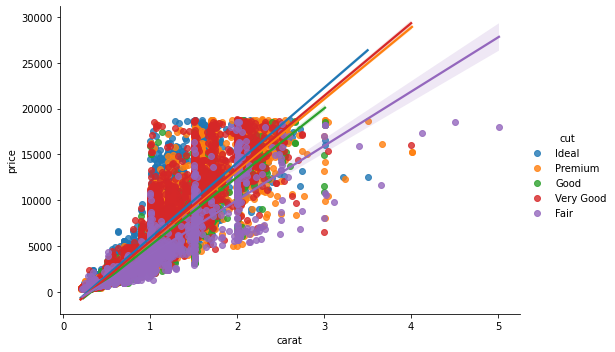

In [21]:
sns.set_style()
sns.lmplot(data=dfd, x='carat', y='price', hue='cut', height=5, aspect=1.5)


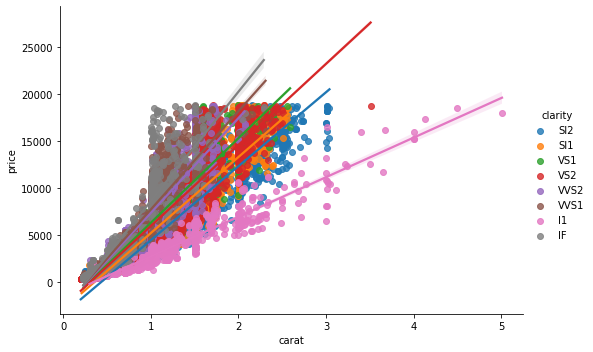

In [22]:
sns.set_style()
sns.lmplot(data=dfd, x='carat', y='price', hue='clarity', height=5, aspect=1.5)


Each diamond is defined by it's size ($x$, $y$, $z$), but in fact what is important is actually the volume of the diamond. Let's add the new feature to the DatFrame:

<AxesSubplot:xlabel='volume', ylabel='Count'>

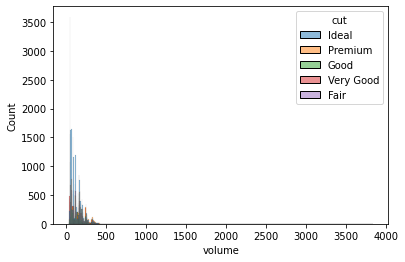

In [23]:
dfd['volume'] = dfd.x * dfd.y * dfd.z
sns.histplot(data=dfd, x="volume", hue="cut")


Let's check the $R^2$ correlation between all the features. For that we will use the method *corr* of the DataFrame, that computes the correlation between all the numerical columns of the DataFrame. As the parameter *name* we pass *pearson* - which stands for the ususal $R^2$. 

To display the correlation matrix, we use the command *heatmap* of the *seaborn* package

<AxesSubplot:>

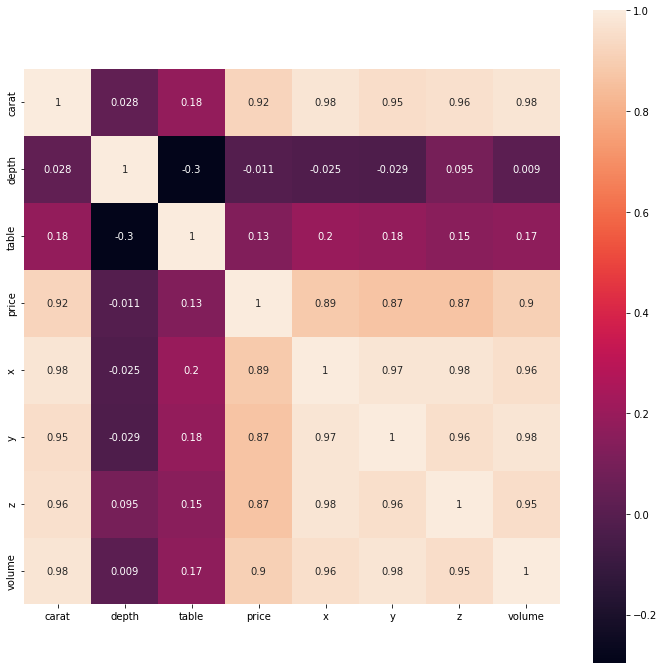

In [24]:
corr_matrix = dfd.corr(method='pearson')
plt.figure(figsize = (12, 12))
sns.heatmap(data=corr_matrix, square=True , annot=True, cbar=True)


Indeed, we observe that the price of the diamond has a high correlation to the size, especially volume, and the amount of carats

Now, let's train the model on the numerical features

In [25]:
Xd = dfd.loc[:, ['carat', 'depth', 'x', 'y', 'z', 'volume']].values
yd = dfd.loc[:, 'price'].values

lin_model_numeric = linear_model.LinearRegression()
lin_model_numeric.fit(Xd, yd)
print("R^2: {:.4f}".format(lin_model_numeric.score(Xd, yd)))
yd_pred = lin_model_numeric.predict(Xd)


R^2: 0.8570


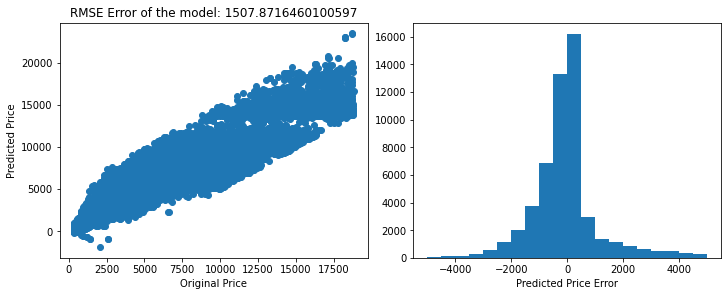

In [26]:
from sklearn import metrics

def plot_results(y, y_pred):
    rmse = metrics.mean_squared_error(y, y_pred)**0.5
    idx = (((y-y_pred)<5000) & ((y-y_pred)>-5000))
    y = y[idx]
    y_pred = y_pred[idx]
    
    fig, ax = plt.subplots(nrows=1, ncols=2, constrained_layout=True, figsize=(10, 4))
    ax[0].scatter(y, y_pred)
    ax[0].set_xlabel('Original Price')
    ax[0].set_ylabel('Predicted Price')
    ax[0].set_title(f'RMSE Error of the model: {rmse}')
    ax[1].hist(y-y_pred, bins=20)
    ax[1].set_xlabel('Predicted Price Error')

plot_results(yd, yd_pred)


### Categorical variables

Until now we built the model on the numerical variables. However, we see that some of the data: variables *cut*, *color* and *clarity* are in the format of string - Categorical variables. In order to take them into account we need to turn them into numbers. There are few possibilities to do it. We will use one of them that assigns each possible values of the variable a positive integer number.

First let's see the possible values of the variables. To do it, we will use the finction *unique()* of the DataFrame

In [27]:
dfd['cut'].unique()

array(['Ideal', 'Premium', 'Good', 'Very Good', 'Fair'], dtype=object)

Now we can just manually change the values to the numerical

In [28]:
dfd['cut'].replace({'Fair': 0, 'Good': 1, 'Very Good': 2, 'Premium': 3, 'Ideal': 4}, inplace=True)

However, there is a faster way to do it for all the Categorical variables, using the *OrdinalEncoder* from the *preprocessing* package of scikit-learn

In [29]:
from sklearn import preprocessing
oe = preprocessing.OrdinalEncoder()
dfd[['cut', 'color', 'clarity']] = oe.fit_transform(dfd.loc[:, ['cut', 'color', 'clarity']].values)

In [ ]:
sns.pairplot(dfd)

In [ ]:
Xd = dfd.loc[:, ['carat', 'cut', 'color', 'clarity', 'depth', 'x', 'y', 'z', 'volume']].values
yd = dfd.loc[:, 'price'].values

lin_model = linear_model.LinearRegression()
lin_model.fit(Xd, yd)
print("R^2: {:.4f}".format(lin_model.score(Xd, yd)))
yd_pred_all = lin_model.predict(Xd)

In [ ]:
plot_results(yd, yd_pred_all)

### Generalization: train/test

After we built the model, we can now check how our model can generalize. In order to do it, we will split the data into train and test using the function from the *model_selection* package of *scikit-learn*. Note that we split the data $80%$ train and $20%$ test randomly. We also specify the *random_state* to be able to reproduce the results


In [ ]:
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(Xd, yd, test_size=0.2, random_state=66)


In [ ]:
lin_model = linear_model.LinearRegression()
lin_model.fit(X_train, y_train)
y_pred_test = lin_model.predict(X_test)

print("Train result: R^2: {:.4f}".format(lin_model.score(X_train, y_train)))
print("Test result: R^2: {:.4f}".format(lin_model.score(X_test, y_test)))
plot_results(y_test, y_pred_test)

Please, observe that our model has a good generalization. Since the error and $R^2$ on train and test data are almost the same

In the next weeks, we will use a more powerful modeling algorithms to train a better model and predicting the price of the diamonds with the much higher accuracy

### Excercise 4

Load the data in the CSV format from the file './data/carmpg.csv'. The data concerns city-cycle fuel consumption in miles per gallon, to be predicted in terms of 3 multivalued discrete and 5 continuous attributes (from 1993). We requisted
* Clean the NaN values
* Perform a basic data analysis: show the data and main variables dependencies
* Turn the categorical variables into the numerical
* Train the Linear regression model predicting the MPG consumption of the cars based on the paramters


# References

- Scikit-learn [supervised learning tutorial](http://scikit-learn.org/stable/tutorial/statistical_inference/supervised_learning.html).
- [Tuning meta-parameters](http://scikit-learn.org/stable/modules/grid_search.html#grid-search) with cross validation.

# Futher exercise

- [Regression with a linear model](../exercises/linear-model.ipynb)
- [Classification with a logistic model](../exercises/logistic-tennis.ipynb)